<a href="https://colab.research.google.com/github/AlenaVert/data-science/blob/master/hw2_tensorflow_by_Verteeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

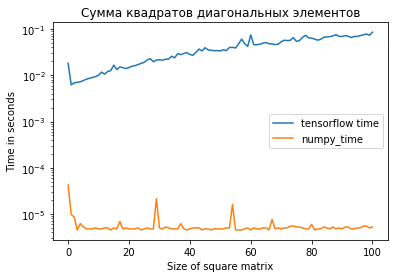

In [0]:
import time

sess = tf.Session()
tf_time = []
np_time = []
ax = np.arange(101)

# For tensorflow
for n in range(101):
    x = tf.random_uniform((n, n))
    
    y = tf.tensordot(tf.diag_part(x),tf.diag_part(x), axes=1)
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    tf_time.append(time_spent)
    

# The same but for numpy
for n in range(101):
    x_np = np.random.rand(n,n)
    
    begin = time.time()
    
    y_np = np.dot(np.diag(x_np),np.diag(x_np))
    
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    np_time.append(time_spent)
    ...


# plot results
plt.plot(ax, tf_time, label="tensorflow time")
plt.plot(ax, np_time, label="numpy_time")
plt.legend()
plt.xlabel('Size of square matrix') 
plt.ylabel('Time in seconds') 
plt.title('Сумма квадратов диагональных элементов')
#plt.xscale("log") 
plt.yscale("log")
plt.show()


sess.close()

Как мы видим, tensorflow работает намного дольше, в то время как numpy выполняет ту же самую операцию за время, 
равное практически 0. Это все достаочно легко объяснить: библиотека tensorflow разрабатывалась для эффективной и 
быстрой работы на GPU, а numpy - нет). Если бы мы запускали данный код на GPU, то библиотека tensorflow сработала бы намного быстрее и показала лучший результат. Те же рассуждения относятся и к графикам, построенным ниже.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


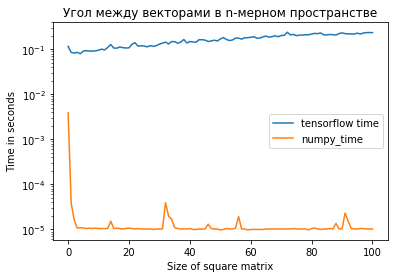

In [0]:
sess = tf.Session()
tf_time = []
np_time = []
ax = np.arange(101)

# For tensorflow
for n in range(101):
    x1 = tf.random_uniform([n])
    x2 = tf.random_uniform([n])
    
    y = tf.acos(tf.tensordot(x1,x2,axes=1)/(tf.linalg.norm(x1)*tf.linalg.norm(x2)))
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    tf_time.append(time_spent)
    

# The same but for numpy
for n in range(101):
    x_np1 = np.random.rand(n)
    x_np2 = np.random.rand(n)
    
    begin = time.time()
    
    #y_np = np.arccos(np.dot(x_np1,x_np1)/(np.linalg.norm(x_np1, ord=1)*np.linalg.norm(x_np2, ord=1)))
    #y_np = np.arccos(np.dot(x_np1,x_np1)/(np.linalg.norm(x_np1)*np.linalg.norm(x_np2)))
    y_np = np.arccos(np.dot(x_np1,x_np2)/(np.linalg.norm(x_np1, ord=2)*np.linalg.norm(x_np2, ord=2)))
    
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    np_time.append(time_spent)
    ...


# plot results
plt.plot(ax, tf_time, label="tensorflow time")
plt.plot(ax, np_time, label="numpy_time")
plt.legend()
plt.xlabel('Size of square matrix') 
plt.ylabel('Time in seconds') 
plt.title('Угол между векторами в n-мерном пространстве')
#plt.xscale("log") 
plt.yscale("log")
plt.show()


sess.close()

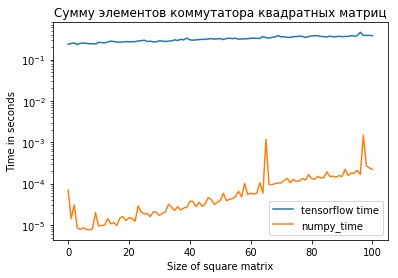

In [0]:
import time

sess = tf.Session()
tf_time = []
np_time = []
ax = np.arange(101)

# For tensorflow
for n in range(101):
    x1 = tf.random_uniform((n, n))
    x2 = tf.random_uniform((n, n))
    
    y = tf.reduce_sum(tf.tensordot(x1,x2, axes=1)-tf.tensordot(x2,x1, axes=1))
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    tf_time.append(time_spent)
    

# The same but for numpy
for n in range(101):
    x_np1 = np.random.rand(n,n)
    x_np2 = np.random.rand(n,n)
    
    begin = time.time()
    
    y_np = np.sum(np.dot(x_np1,x_np2)-np.dot(x_np2,x_np1))
    
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    np_time.append(time_spent)
    ...


# plot results
plt.plot(ax, tf_time, label="tensorflow time")
plt.plot(ax, np_time, label="numpy_time")
plt.legend()
plt.xlabel('Size of square matrix') 
plt.ylabel('Time in seconds') 
plt.title('Сумму элементов коммутатора квадратных матриц')
#plt.xscale("log") 
plt.yscale("log")
plt.show()


sess.close()

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [0]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

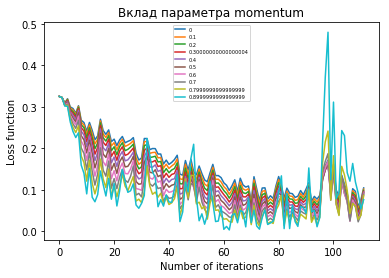

In [0]:
# пусть моментум сначала будет равен 0
# будем увеличивать его на 0.05 пока он не станет равен 1 (и более) и посмотрим, какой вклад он вносит 
moment = 0
for i in range(10): 
  watch =  tf.train.MomentumOptimizer(learning_rate=0.01, momentum=moment).minimize(loss)
  losses=train(X, y, watch)
  number_iter=np.arange(len(losses))
  plt.plot(number_iter, losses,  label=moment)
  plt.legend(fontsize=5)
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss function')
  plt.title('Вклад параметра momentum')
  moment += 0.1    # увеличиваем моментум

Ваш ответ: Кажется, что при значениях моментума средних (0.5, 0.6, 0.7, 0.8, 0.9) наша функция потерь достигает своего минимума быстрее и не так сильно колеблется настолько сильно. Как мы видим из кода train() - батчи получаются путем деления всей выборки на группы по 16 элементов в каждой. Если же настроить алгоритм на рандомное получение батчей из данных, график может стать более понятным.Для этого возьмем код из первой домашки и изменим train() и посмотрим, что изменится!

In [0]:
def train_Al(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                size = np.random.choice(X.shape[0])   # рандомно выбираем батч
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[size:(size+1)*batch_size],
                                                                 y_input: y[size:(size+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

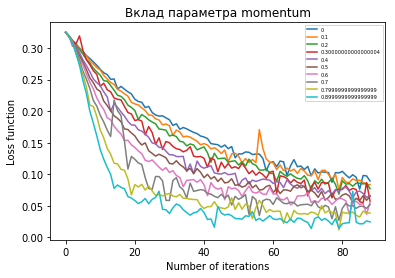

In [0]:
moment = 0
for i in range(10): 
  watch =  tf.train.MomentumOptimizer(learning_rate=0.01, momentum=moment).minimize(loss)
  losses=train_Al(X, y, watch, batch_size=20)
  number_iter=np.arange(len(losses))
  plt.plot(number_iter, losses,  label=moment)
  plt.legend(fontsize=5)
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss function')
  plt.title('Вклад параметра momentum')
  moment += 0.1    # увеличиваем моментум

И как мы видим, график стал намного более приятным и понятным для анализа. Сейчас очевидно, что чем больше моментум, тем быстрее наша функция потерь приходит в свой минимум и тем меньше колеблется далее. Наименьшее значение мы получили при моментуме равном 0.9 - график при данном значении достиг своего минимума(который кстати меньше всех остальных минимумов других линий) и меньше всего колеблется. Следовательно, чем больше мы ставим моментум, тем быстрее и качественнее мы найдем минимум.


**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

Проведем все те же операции, что и с предыдущим номером (то есть покажем 2 графика: один для train(), другой для train_Al())


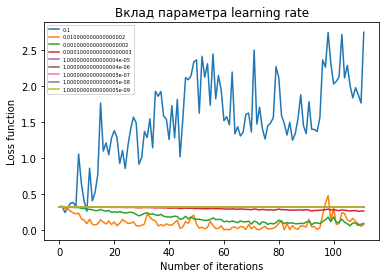

In [0]:
learn = 0.1
for i in range(9): 
  watch =  tf.train.MomentumOptimizer(learning_rate=learn, momentum=0.9).minimize(loss)
  losses=train(X, y, watch)
  number_iter=np.arange(len(losses))
  plt.plot(number_iter, losses,  label=learn)
  plt.legend(fontsize=5)
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss function')
  plt.title('Вклад параметра learning rate')
  learn = learn * 0.1    # уменьшаем learning rate

Как мы видим самое минимальное значение быстрее всего находится при минимальном learning rate ( то есть можно сказать, что чем меньше мы берем learning rate тем меньше будет значение функции потерь и тем быстрее мы найдем минимум). Но смущает сильное колебание графика при learning rate = (0,1)^9. Постараемся убрать такое сильное колебание на графике ниже, для этого посмотрим, как изменится график при использовании модифицированной функции train_Al().

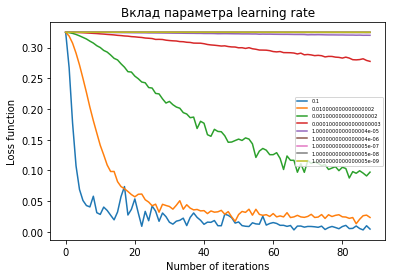

In [0]:
learn = 0.1
for i in range(9): 
  watch =  tf.train.MomentumOptimizer(learning_rate=learn, momentum=0.9).minimize(loss)
  losses=train_Al(X, y, watch, batch_size=20)
  number_iter=np.arange(len(losses))
  plt.plot(number_iter, losses,  label=learn)
  plt.legend(fontsize=5)
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss function')
  plt.title('Вклад параметра learning rate')
  learn = learn * 0.1    # уменьшаем learning rate

Ваш ответ: Здесь мы отчетливо видим, что минимум быстрее всего сходится при learning rate = 0,1. Как мы видим он быстрее всех достиг минимума и практически не колеблется впоследствии.Следовательно, чем меньше мы возьмем learning rate, тем быстрее сойдется функция потерь.


**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

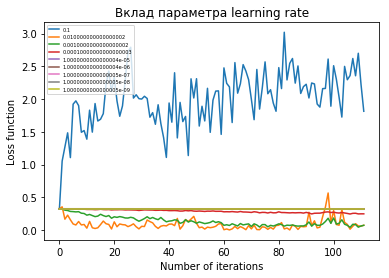

In [0]:
learn = 0.1
for i in range(9): 
  watch =  tf.train.AdamOptimizer(learning_rate=learn).minimize(loss)
  losses=train(X, y, watch)
  number_iter=np.arange(len(losses))
  plt.plot(number_iter, losses,  label=learn)
  plt.legend(fontsize=5)
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss function')
  plt.title('Вклад параметра learning rate')
  learn = learn * 0.1    # уменьшаем learning rate

Наиболее быстро сошлись графики при минимальных learning rate, но минимум, найденный при данных параметрах не наименьший. Поэтому посмотрим графики при train_Al().

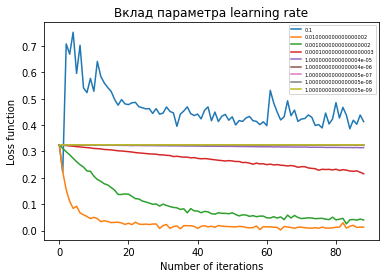

In [0]:
learn = 0.1
for i in range(9): 
  watch =  tf.train.AdamOptimizer(learning_rate=learn).minimize(loss)
  losses=train_Al(X, y, watch, batch_size=20)
  number_iter=np.arange(len(losses))
  plt.plot(number_iter, losses,  label=learn)
  plt.legend(fontsize=5)
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss function')
  plt.title('Вклад параметра learning rate')
  learn = learn * 0.1    # уменьшаем learning rate

Ваш ответ: Мы видим, что ниабольших успехов мы достигли при learning rate равном 0.01 (он сошелся и показывает минимальные значения).

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

Text(0.5, 1.0, 'Вклад параметра learning rate')

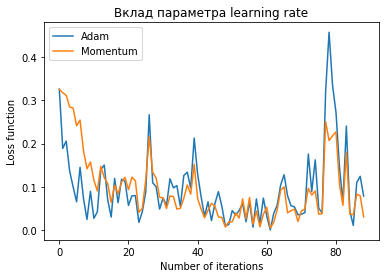

In [0]:
watch1 =  tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
losses1=train(X, y, watch1, batch_size=20)
number_iter1=np.arange(len(losses1))
watch2 =  tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9).minimize(loss)
losses2=train(X, y, watch2, batch_size=20)
number_iter2=np.arange(len(losses2))
plt.plot(number_iter1, losses1, label="Adam")
plt.plot(number_iter2, losses2, label="Momentum")
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')
plt.title('Вклад параметра learning rate')

При последовательных батчах (при заданных параметрах learning rate and momentum) сложно выделить, какой из алгоритмов работает лучше.

Text(0.5, 1.0, 'Вклад параметра learning rate')

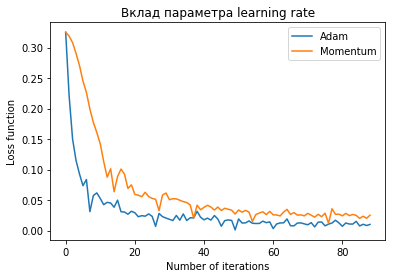

In [0]:
watch1 =  tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
losses1=train_Al(X, y, watch1, batch_size=20)
number_iter1=np.arange(len(losses1))
watch2 =  tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9).minimize(loss)
losses2=train_Al(X, y, watch2, batch_size=20)
number_iter2=np.arange(len(losses2))
plt.plot(number_iter1, losses1, label="Adam")
plt.plot(number_iter2, losses2, label="Momentum")
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')
plt.title('Вклад параметра learning rate')

При рандомном выборе батчей (при заданных параметрах learning rate and momentum) мы видим, что Adam работеат лучше, чем Momentum.

Ваш ответ: ...

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [39]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

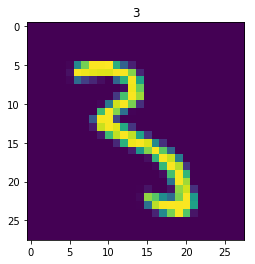

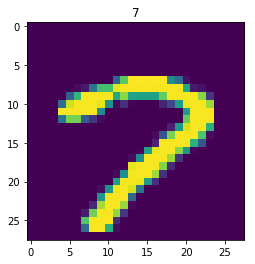

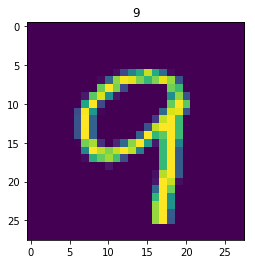

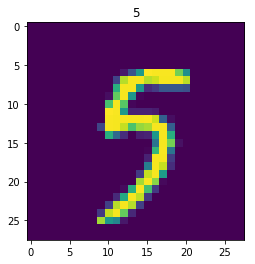

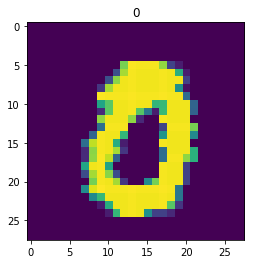

In [40]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [50]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

layer1 = tf.layers.dense(X_input, 1300, activation=tf.nn.relu)   #<define architecture as a function of X_input>
layer2 = tf.layers.dense(layer1, 300, activation=tf.nn.relu6)
layer3 = tf.layers.dense(layer2, 70, activation=tf.nn.selu)
layer4 = tf.layers.dense(layer3, 15, activation=tf.nn.sigmoid)
logits = tf.layers.dense(layer4, n_labels)
...
predicted = tf.nn.softmax(logits)      #<define 10-class outputs>

loss = tf.losses.log_loss(labels=tf.one_hot(y_input, depth=n_labels), predictions=predicted)      #<define log loss with one-hot vector of labels
train_op = tf.train.AdamOptimizer(learning_rate=0.0004).minimize(loss)#<define train operation here>

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.978


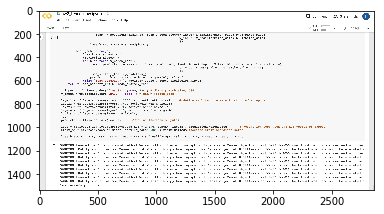

In [53]:
img = plt.imread('СкринЭкрана.png')
plt.imshow(img)

Populating the interactive namespace from numpy and matplotlib


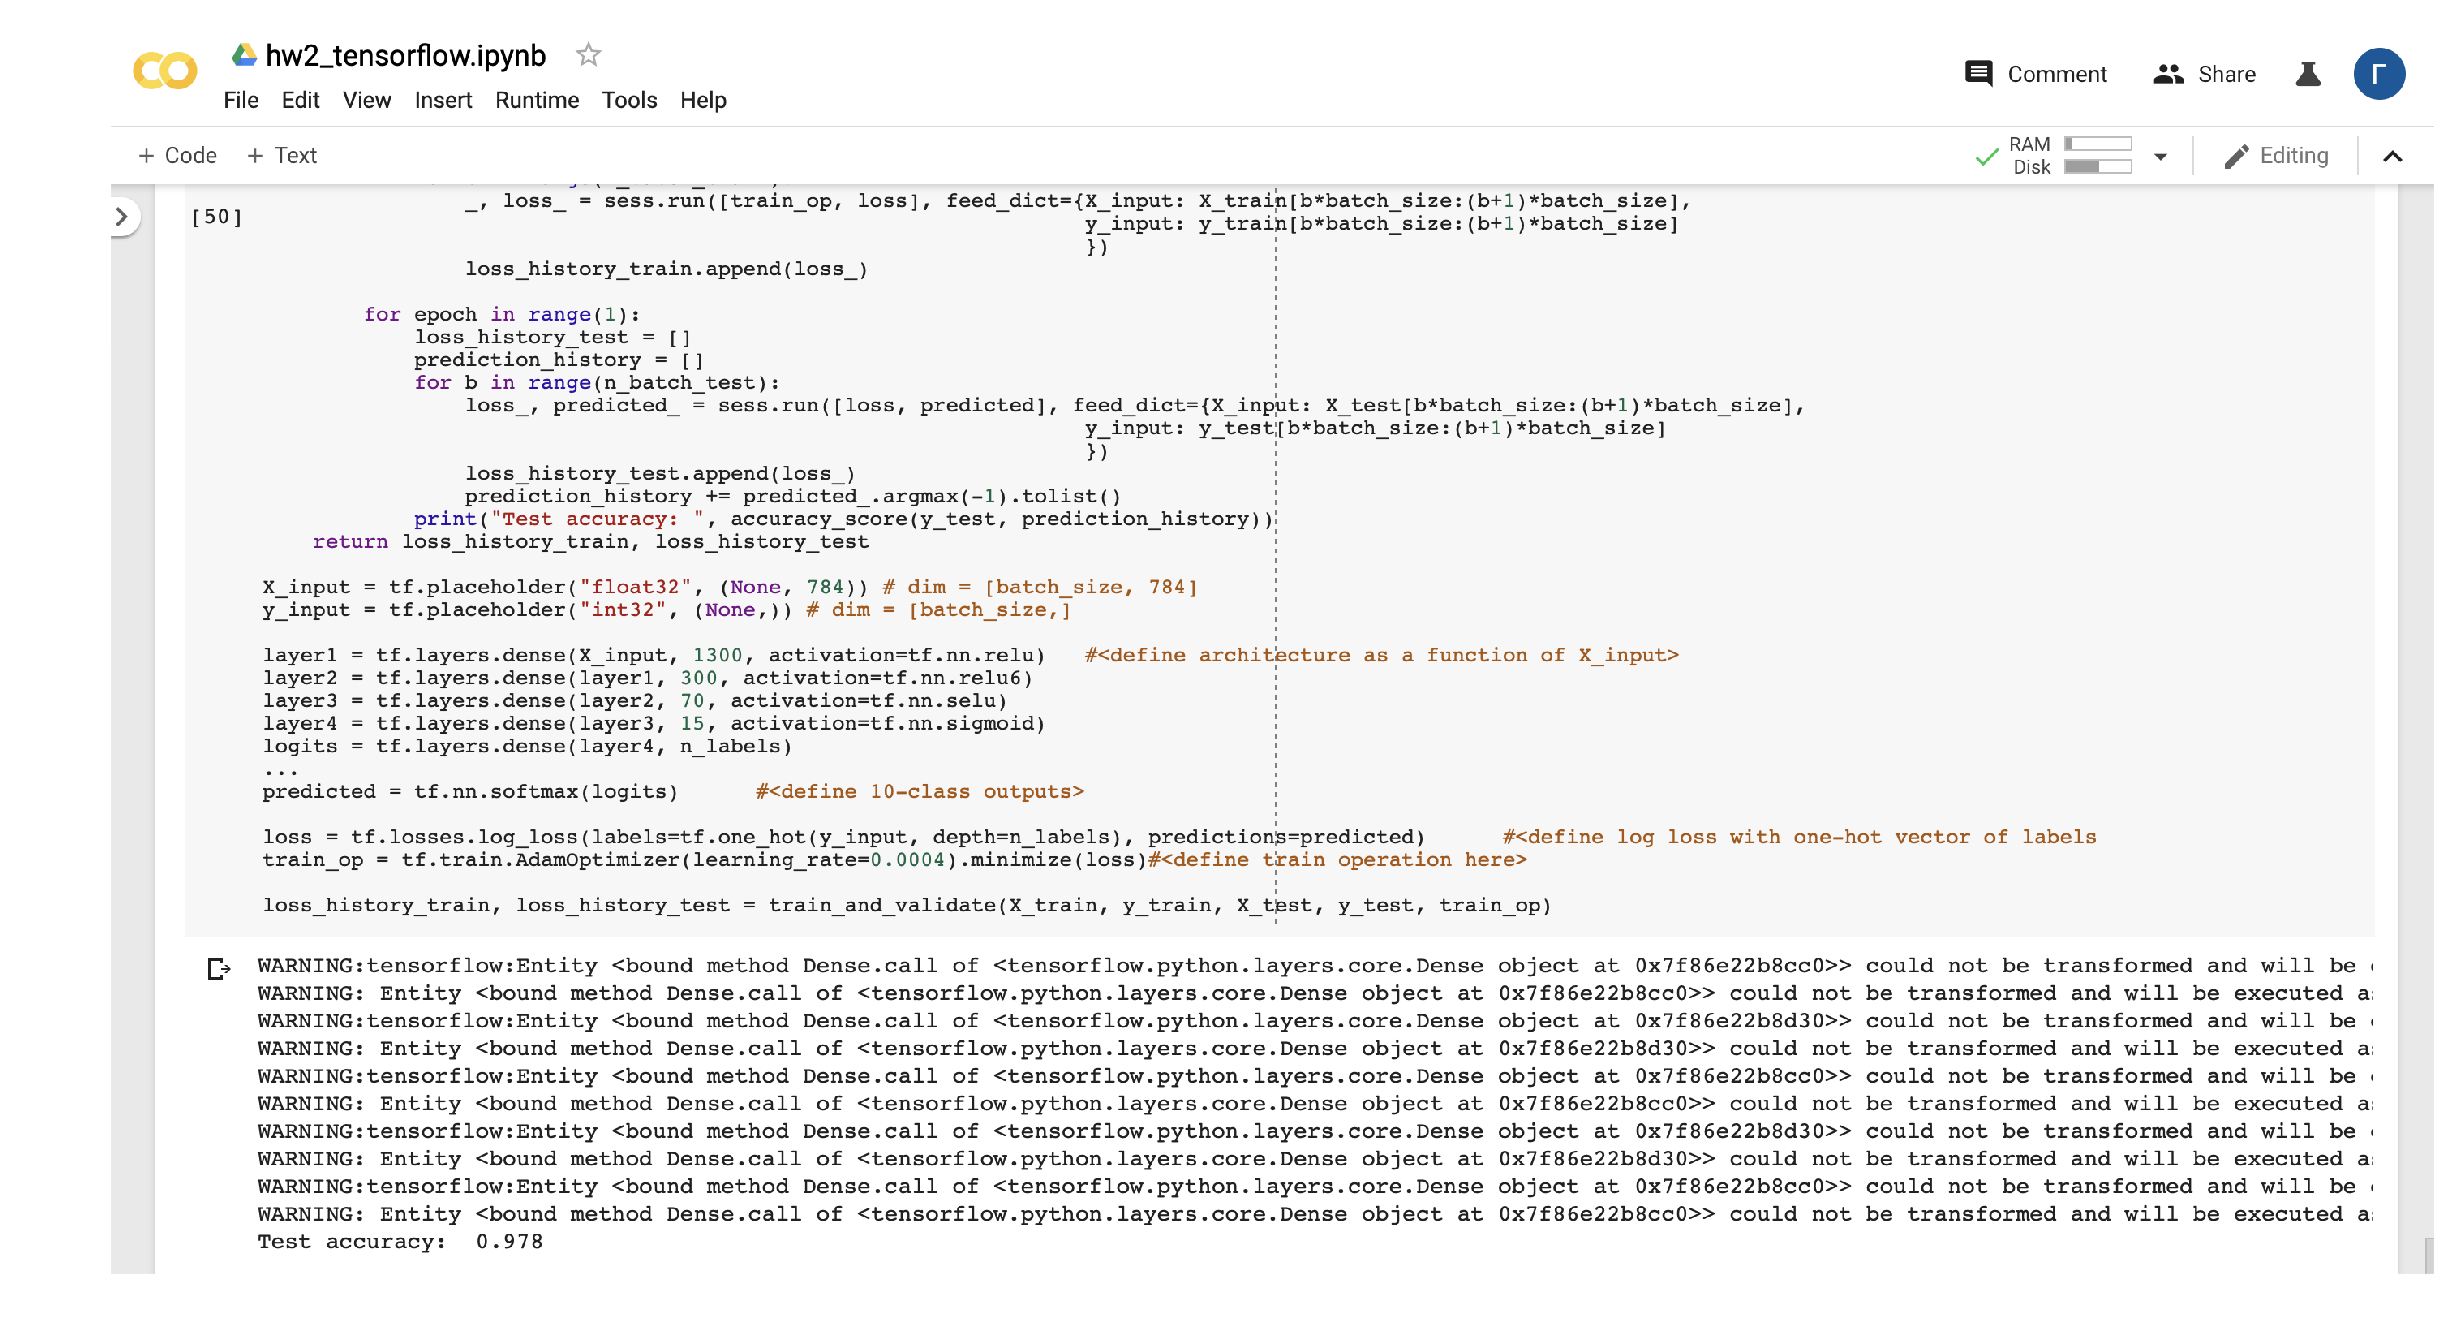

In [59]:
%pylab inline
figure(figsize=(15, 25), dpi=200)
img = plt.imread('СкринЭкрана.png')
plt.imshow(img)
plt.show()

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwimn8PCo4flAhVs16YKHbDnBJQQjRx6BAgBEAQ&url=%2Furl%3Fsa%3Di%26rct%3Dj%26q%3D%26esrc%3Ds%26source%3Dimages%26cd%3D%26ved%3D%26url%3Dhttps%253A%252F%252Fwww.meme-arsenal.com%252Fcreate%252Fmeme%252F537681%26psig%3DAOvVaw3VqU9B1ikZxKtcZRKMbvTP%26ust%3D1570438947879731&psig=AOvVaw3VqU9B1ikZxKtcZRKMbvTP&ust=1570438947879731

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

In [0]:
Очень-очень не хватает лекций. Хочется услышать все эти лекции в живую с возможностью спросить, уточнить, попросить 
больше примеров для лучшего понимания. Курс весьмя интересный и познавательный, приходится много искать и учить самой.
Достаточно не просто понять все с первого раза на семинаре.